# Shifting relationships

Plot the 30-year running correlation between Caribbean rainfall and:
- tropical north Atlantic SST, 850-hPa zonal wind speeds
- SST convective threshold
- the Caribbean low-level jet (CLLJ) index

In [1]:
# Package imports
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr


## Retrieve seasonal indices

In [6]:
# Retrieve indices from data folder
tna_sst_early = pd.read_csv('../data/seasonal_indices/tna_MJJ_sst_index.csv', header='infer').set_index('time').to_xarray()['tna_sst']
tna_wind_early = pd.read_csv('../data/seasonal_indices/tna_MJJ_u925_index.csv', header='infer').set_index('time').to_xarray()['tna_u925']
sst_thresh = pd.read_csv('../data/seasonal_indices/sst_critical_MJJ_index.csv', header='infer').set_index('time').to_xarray()['sst_thresh']
cllj_early = pd.read_csv('../data/seasonal_indices/cllj_MJJ_index.csv', header='infer').set_index('time').to_xarray()['cllj_index']
tna_prcp_early = pd.read_csv('../data/seasonal_indices/tna_MJJ_prcp_index.csv', header='infer').set_index('time').to_xarray()['tna_prcp']
tna_rsst_early = pd.read_csv('../data/seasonal_indices/tna_MJJ_rsst_index.csv', header='infer').set_index('time').to_xarray()['tna_rsst']

# Convert time index to datetime64
tna_sst_early['time'] = pd.to_datetime(tna_sst_early['time'].values)
tna_wind_early['time'] = pd.to_datetime(tna_wind_early['time'].values)
sst_thresh['time'] = pd.to_datetime(sst_thresh['time'].values)
cllj_early['time'] = pd.to_datetime(cllj_early['time'].values)
tna_prcp_early['time'] = pd.to_datetime(tna_prcp_early['time'].values)
tna_rsst_early['time'] = pd.to_datetime(tna_rsst_early['time'].values)

## Calculate the 30-year running correlations

In [ ]:
# Function to calculate running correlation betweeb two time series
def running_correlation(da1, da2, window):
  """
  Calculates the running correlation between two xarray DataArrays.

  Args:
    da1: First DataArray.
    da2: Second DataArray.
    window: Window size for the running correlation.

  Returns:
    DataArray containing the running correlation.
  """
  # Ensure both DataArrays have the same time dimension
  ds = xr.Dataset({'series1': da1,
                   'series2': da2
                   })

  rolling = ds.rolling(time=window, center=True)
  with_dim = rolling.construct('window_dim')

  return xr.corr(with_dim['series1'], with_dim['series2'], dim='window_dim')

# Calculate running mean
prcp_sst_correlation = running_correlation(tna_sst_early, tna_prcp_early, 30)
prcp_sstc_correlation = running_correlation(sst_thresh, tna_prcp_early, 30)
prcp_rsst_correlation = running_correlation(tna_rsst_early, tna_prcp_early, 30)
prcp_u925_correlation = running_correlation(tna_wind_early, tna_prcp_early, 30)
prcp_cllj_correlation = running_correlation(cllj_early, tna_prcp_early, 30)


## Generate the plot

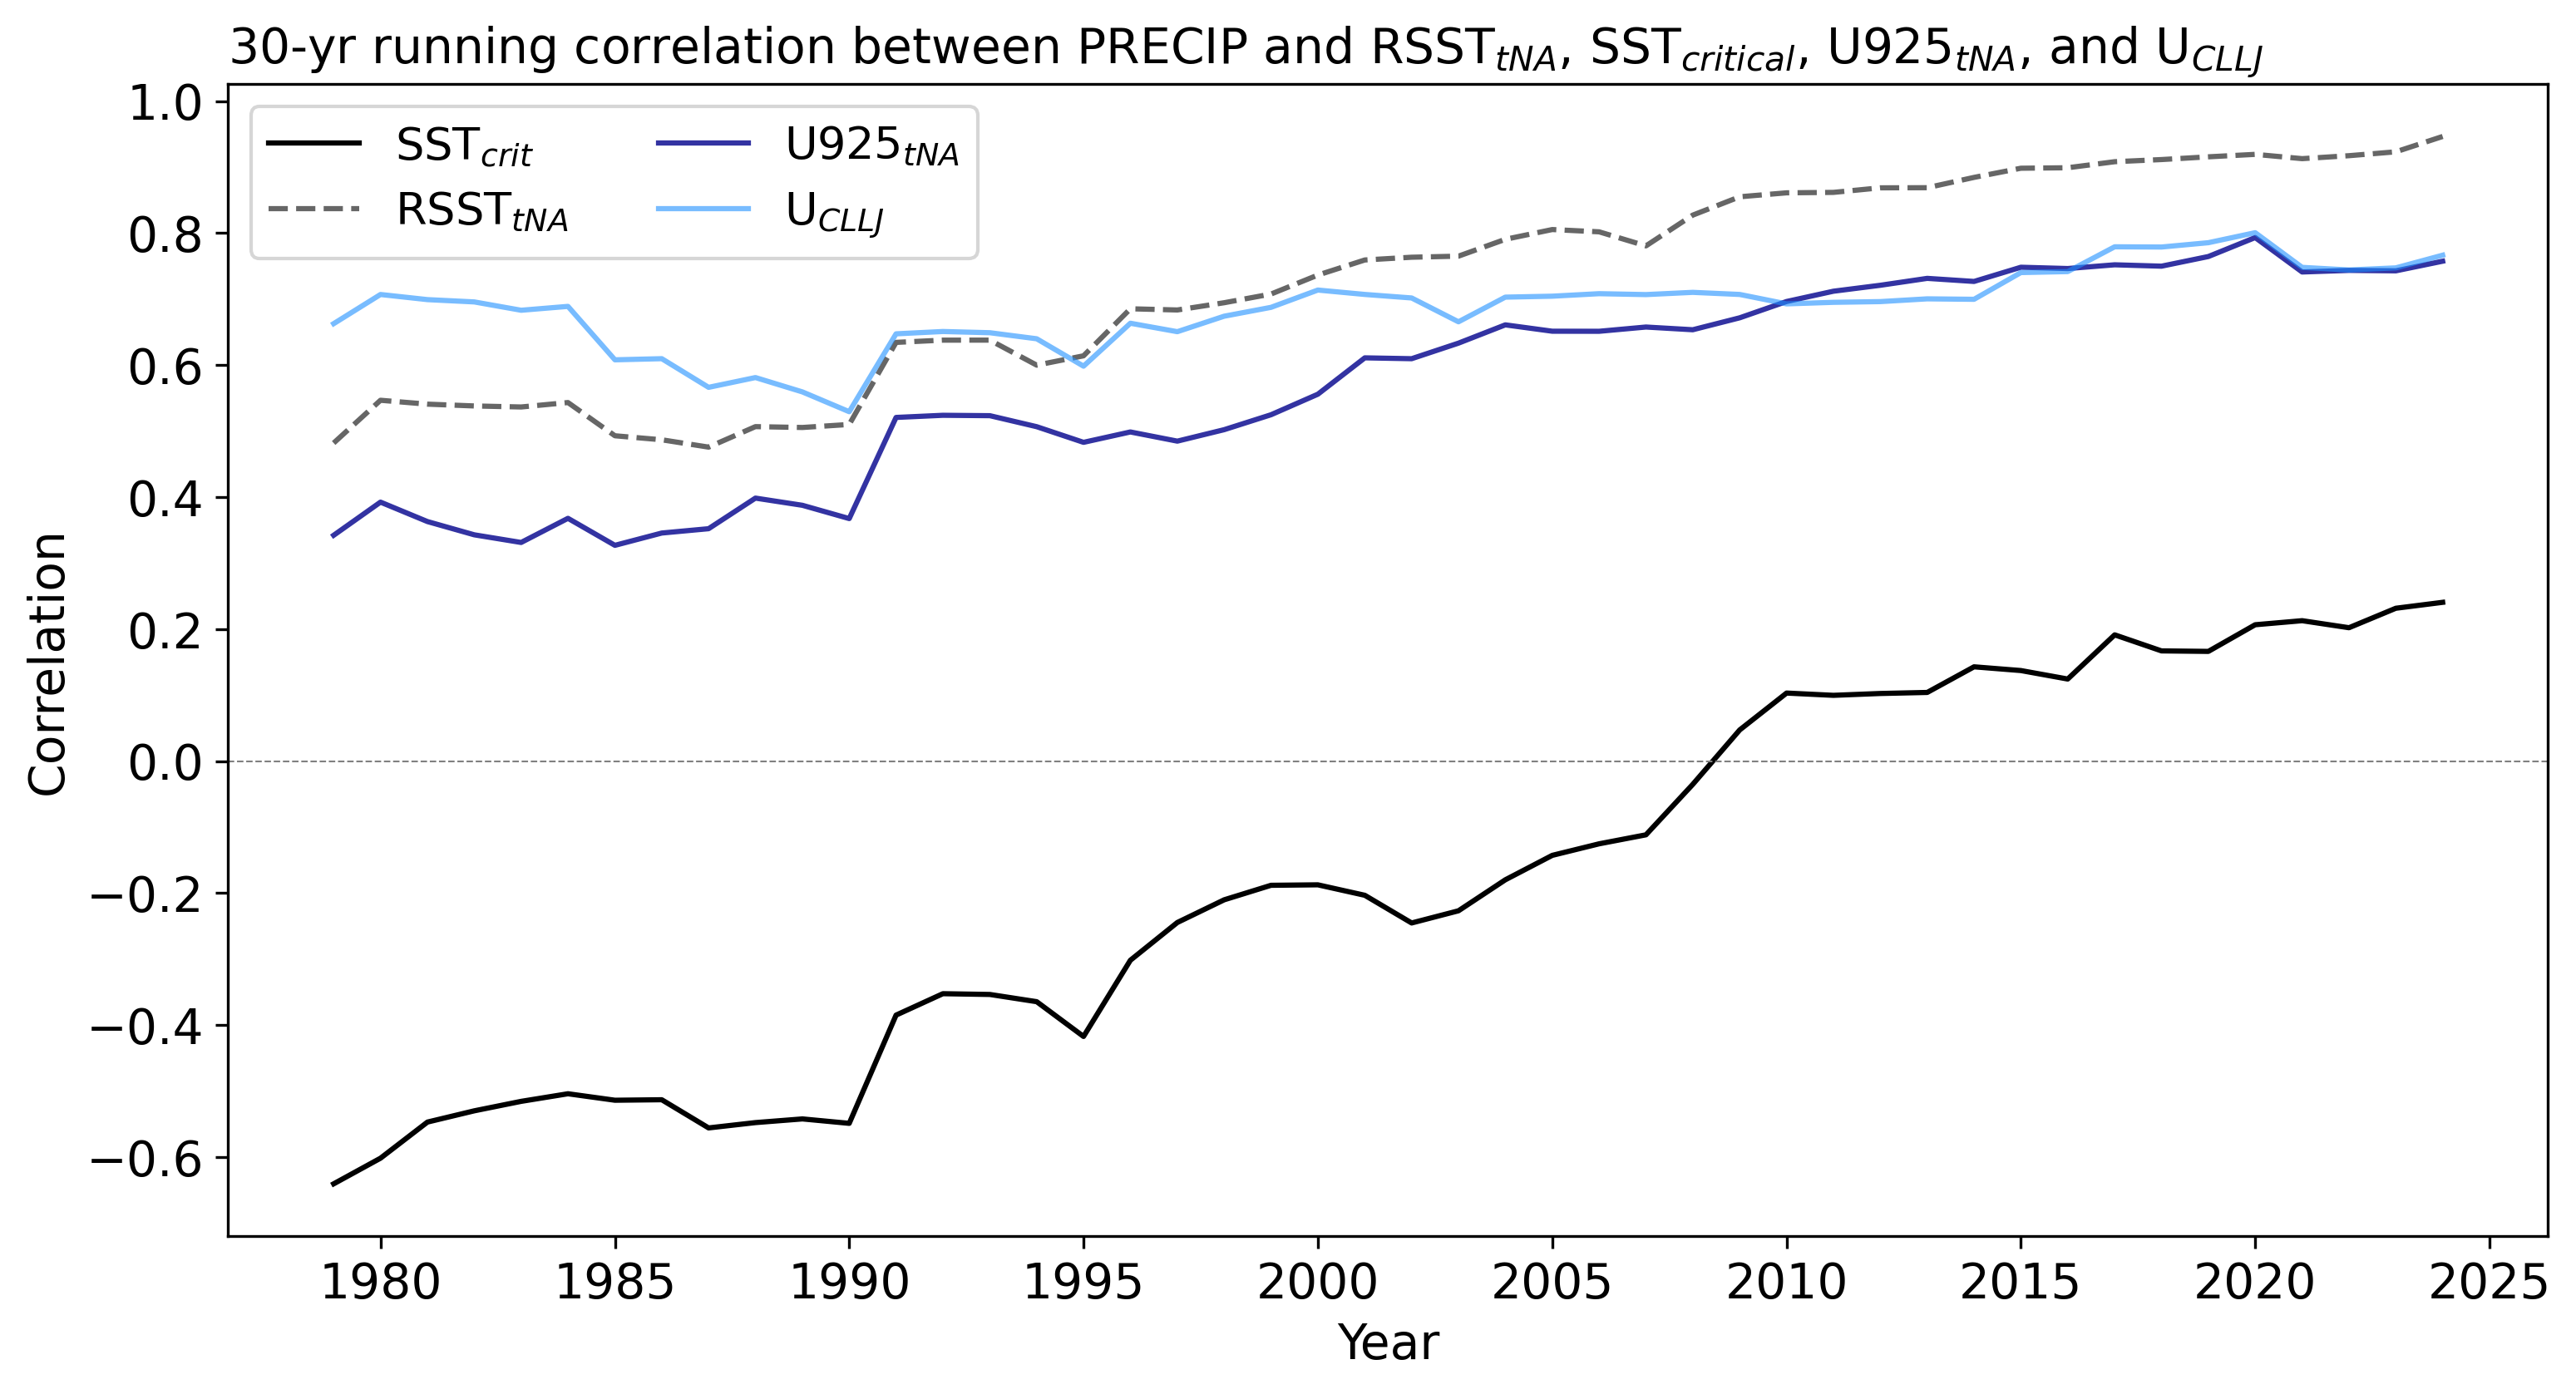

In [ ]:
plt.figure(figsize=(12, 6), dpi=300)

# Plotting running correlations
prcp_sstc_correlation.plot(color='black', lw=1.5, label='SST$_{crit}$')
prcp_rsst_correlation.plot(color='black', ls='--', alpha=0.6, label='RSST$_{tNA}$')
prcp_u925_correlation.plot(color='darkblue', alpha=0.8, label='U925$_{tNA}$')
prcp_cllj_correlation.plot(color='dodgerblue', alpha=0.6, label='U$_{CLLJ}$')

plt.axhline(y=0, color='gray', lw=0.5, ls='--')
plt.tick_params(labelsize=14)
plt.ylabel('Correlation', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('30-yr running correlation between PRECIP and RSST$_{tNA}$, SST$_{critical}$, U925$_{tNA}$, and U$_{CLLJ}$', loc='left', fontsize=14)
plt.legend(ncol=2, fontsize=13)

# --- Save figure ---
plt.savefig('../figures/figure4_30yr_running_corr.pdf', dpi=300, format='pdf', bbox_inches='tight')